In [3]:
!pip install langchain openai langgraph langchain_openai langchain_core graphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 14.8 MB/s eta 0:00:00


In [ ]:
import os,getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

os.environ["OPENAI_API_KEY"] = "open_api_key"

In [5]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo")

In [6]:
from langgraph.graph import MessagesState
from langchain_core.messages import SystemMessage, HumanMessage

system_message = SystemMessage(content="You are a helpful assistant to respond to general purpose queries.")

def assistant(state: MessagesState):
    return {"messages": [llm.invoke([system_message] + state["messages"])]}

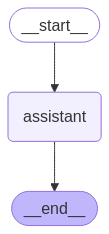

In [9]:
from langgraph.graph import START, StateGraph, END
from IPython.display import Image, display

builder = StateGraph(MessagesState)

builder.add_node("assistant", assistant)

builder.add_edge(START, "assistant")
builder.add_edge("assistant", END)

react_graph = builder.compile()

display(Image(react_graph.get_graph(xray=True).draw_mermaid_png()))


In [16]:
messages = [HumanMessage(content="Tell me what is the capital of India?")]
messages = react_graph.invoke({"messages": messages})
for m in messages['messages']:
    m.pretty_print()

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}